In [1]:
import pickle
with open('/home/ubuntu/cs224r_project/metrics/20250604_074109_1056.pkl', 'rb') as f:
    data = pickle.load(f)

In [2]:
data

{'run_name': 'glad-durian-74',
 'beta': 0.01,
 'step': 1056,
 'val_loss': 14.801734924316406,
 'examples_seen': 16896,
 'valid_fraction': 0.2,
 'diversity': 0.9762427609445614,
 'affinity': [-8.9, -8.2],
 'qed': [0.49485662432595573, 0.36431709042131444],
 'sa': [0.6961456725146242, 0.6005262814372528],
 'lipinski': [4, 5, 4, 5, 3, 5, 2]}

In [12]:
import pickle
with open("/home/ubuntu/cs224r_project/metrics/20250604_064517_0.pkl", 'rb') as f:
    data_baseline = pickle.load(f)
with open("/home/ubuntu/cs224r_project/metrics/20250604_064517_396.pkl", 'rb') as f:
    data_ours = pickle.load(f)

In [26]:
with open('generation_ara2a_ours_396.pkl', 'rb') as f:
    mols_ours = pickle.load(f)
with open('generation_ara2a_ours_0.pkl', 'rb') as f:
    mols_baseline = pickle.load(f)

In [32]:
type(mols[3])

rdkit.Chem.rdchem.Mol

In [41]:
import py3Dmol
from rdkit import Chem
for mol in mols:
    mol_block = Chem.MolToMolBlock(mol)
    width=200
    height=200
    style="stick"
    viewer = py3Dmol.view(width=width, height=height)
    viewer.addModel(mol_block, "mol")
    viewer.setStyle({style: {}})
    viewer.setBackgroundColor("white")
    viewer.zoomTo()
    viewer.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

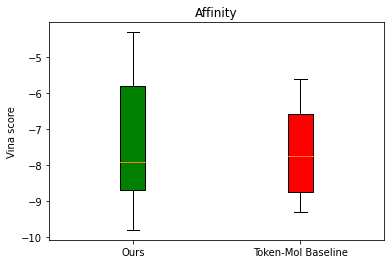

In [14]:
import matplotlib.pyplot as plt

colors = ['red', 'green']
tick_labels = ['Token-Mol Baseline', 'Ours']
plt.title('Affinity')
plot = plt.boxplot([data_baseline['affinity'], data_ours['affinity']], patch_artist=True, sym="", labels=tick_labels)
for patch, color in zip(plot['boxes'], colors):
    patch.set_facecolor(color)
# plt.xlabel('Model')
plt.ylabel('Vina score')
plt.show()

In [17]:
data_ours['valid_fraction']

0.8

ValueError: Dimensions of labels and X must be compatible

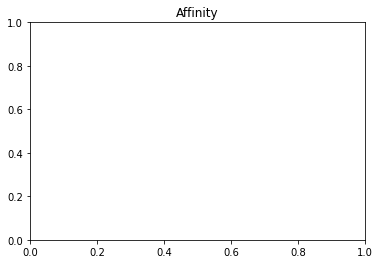

In [15]:
import matplotlib.pyplot as plt

colors = ['green', 'red']
tick_labels = ['Ours', 'Token-Mol Baseline']
plt.title('Affinity')
plot = plt.boxplot([data_baseline['valid_fraction'], data_ours['valid_fraction']], patch_artist=True, sym="", labels=tick_labels)
for patch, color in zip(plot['boxes'], colors):
    patch.set_facecolor(color)
# plt.xlabel('Model')
plt.ylabel('Validity')
plt.show()

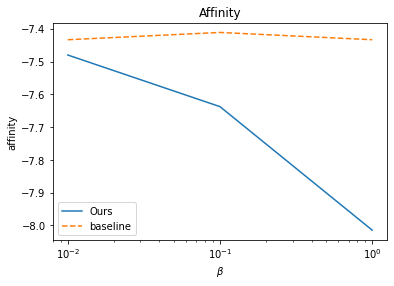

In [19]:
import numpy as np
import pickle

filenames_ours = ['/home/ubuntu/cs224r_project/metrics/20250604_074109_264.pkl', '/home/ubuntu/cs224r_project/metrics/20250604_064517_396.pkl', '/home/ubuntu/cs224r_project/metrics/20250604_083044_132.pkl']
betas = [0.01, 0.1, 1.0]
affinities_ours = []
for filename in filenames_ours:
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    affinities_ours.append(np.mean(data['affinity']))

filenames_baseline = ['/home/ubuntu/cs224r_project/metrics/20250604_074109_0.pkl', '/home/ubuntu/cs224r_project/metrics/20250604_064517_0.pkl', '/home/ubuntu/cs224r_project/metrics/20250604_083044_0.pkl']
affinities_baseline = []
for filename in filenames_baseline:
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    affinities_baseline.append(np.mean(data['affinity']))

plt.title("Affinity")
plt.plot(betas, affinities_ours, label='Ours')
plt.plot(betas, affinities_baseline, label='baseline', linestyle='--')
plt.xlabel(r'$\beta$')
plt.ylabel('affinity')
plt.xscale('log')
plt.legend()
plt.show()


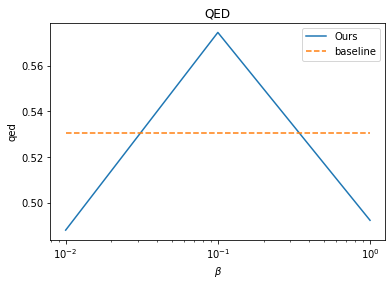

In [20]:
filenames_ours = ['/home/ubuntu/cs224r_project/metrics/20250604_074109_264.pkl', '/home/ubuntu/cs224r_project/metrics/20250604_064517_396.pkl', '/home/ubuntu/cs224r_project/metrics/20250604_083044_132.pkl']
betas = [0.01, 0.1, 1.0]
qed_ours = []
for filename in filenames_ours:
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    qed_ours.append(np.mean(data['qed']))

filenames_baseline = ['/home/ubuntu/cs224r_project/metrics/20250604_074109_0.pkl', '/home/ubuntu/cs224r_project/metrics/20250604_064517_0.pkl', '/home/ubuntu/cs224r_project/metrics/20250604_083044_0.pkl']
qed_baseline = []
for filename in filenames_baseline:
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    qed_baseline.append(np.mean(data['qed']))

plt.title("QED")
plt.plot(betas, qed_ours, label='Ours')
plt.plot(betas, qed_baseline, label='baseline', linestyle='--')
plt.xlabel(r'$\beta$')
plt.ylabel('qed')
plt.xscale('log')
plt.legend()
plt.show()

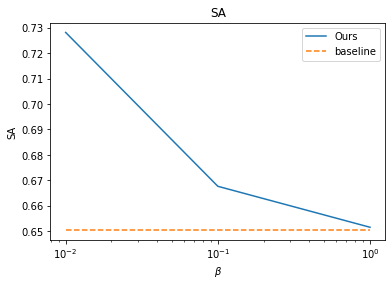

In [5]:
filenames_ours = ['/home/ubuntu/cs224r_project/metrics/20250604_074109_264.pkl', '/home/ubuntu/cs224r_project/metrics/20250604_064517_396.pkl', '/home/ubuntu/cs224r_project/metrics/20250604_083044_132.pkl']
betas = [0.01, 0.1, 1.0]
sa_ours = []
for filename in filenames_ours:
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    sa_ours.append(np.mean(data['sa']))

filenames_baseline = ['/home/ubuntu/cs224r_project/metrics/20250604_074109_0.pkl', '/home/ubuntu/cs224r_project/metrics/20250604_064517_0.pkl', '/home/ubuntu/cs224r_project/metrics/20250604_083044_0.pkl']
sa_baseline = []
for filename in filenames_baseline:
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    sa_baseline.append(np.mean(data['sa']))

plt.title("SA")
plt.plot(betas, sa_ours, label='Ours')
plt.plot(betas, sa_baseline, label='baseline', linestyle='--')
plt.xlabel(r'$\beta$')
plt.ylabel('SA')
plt.xscale('log')
plt.legend()
plt.show()

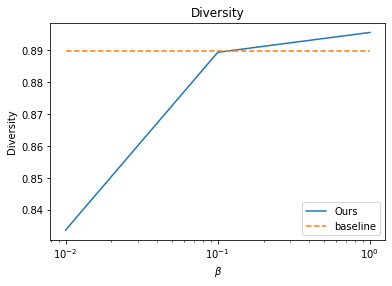

In [22]:
filenames_ours = ['/home/ubuntu/cs224r_project/metrics/20250604_074109_264.pkl', '/home/ubuntu/cs224r_project/metrics/20250604_064517_396.pkl', '/home/ubuntu/cs224r_project/metrics/20250604_083044_132.pkl']
betas = [0.01, 0.1, 1.0]
div_ours = []
for filename in filenames_ours:
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    div_ours.append(data['diversity'])

filenames_baseline = ['/home/ubuntu/cs224r_project/metrics/20250604_074109_0.pkl', '/home/ubuntu/cs224r_project/metrics/20250604_064517_0.pkl', '/home/ubuntu/cs224r_project/metrics/20250604_083044_0.pkl']
div_baseline = []
for filename in filenames_baseline:
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    div_baseline.append(data['diversity'])

plt.title("Diversity")
plt.plot(betas, div_ours, label='Ours')
plt.plot(betas, div_baseline, label='baseline', linestyle='--')
plt.xlabel(r'$\beta$')
plt.ylabel('Diversity')
plt.xscale('log')
plt.legend()
plt.show()

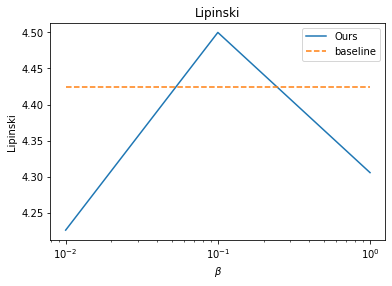

In [6]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

filenames_ours = ['/home/ubuntu/cs224r_project/metrics/20250604_074109_264.pkl', '/home/ubuntu/cs224r_project/metrics/20250604_064517_396.pkl', '/home/ubuntu/cs224r_project/metrics/20250604_083044_132.pkl']
betas = [0.01, 0.1, 1.0]
div_ours = []
for filename in filenames_ours:
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    div_ours.append(np.mean(data['lipinski']))

filenames_baseline = ['/home/ubuntu/cs224r_project/metrics/20250604_074109_0.pkl', '/home/ubuntu/cs224r_project/metrics/20250604_064517_0.pkl', '/home/ubuntu/cs224r_project/metrics/20250604_083044_0.pkl']
div_baseline = []
for filename in filenames_baseline:
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    div_baseline.append(np.mean(data['lipinski']))

plt.title("Lipinski")
plt.plot(betas, div_ours, label='Ours')
plt.plot(betas, div_baseline, label='baseline', linestyle='--')
plt.xlabel(r'$\beta$')
plt.ylabel('Lipinski')
plt.xscale('log')
plt.legend()
plt.show()

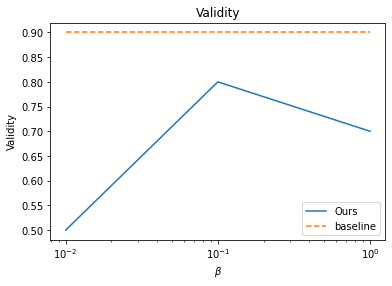

In [10]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

filenames_ours = ['/home/ubuntu/cs224r_project/metrics/20250604_074109_264.pkl', '/home/ubuntu/cs224r_project/metrics/20250604_064517_396.pkl', '/home/ubuntu/cs224r_project/metrics/20250604_083044_132.pkl']
betas = [0.01, 0.1, 1.0]
div_ours = []
for filename in filenames_ours:
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    div_ours.append(np.mean(data['valid_fraction']))

filenames_baseline = ['/home/ubuntu/cs224r_project/metrics/20250604_074109_0.pkl', '/home/ubuntu/cs224r_project/metrics/20250604_064517_0.pkl', '/home/ubuntu/cs224r_project/metrics/20250604_083044_0.pkl']
div_baseline = []
for filename in filenames_baseline:
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    div_baseline.append(np.mean(data['valid_fraction']))

plt.title("Validity")
plt.plot(betas, div_ours, label='Ours')
plt.plot(betas, div_baseline, label='baseline', linestyle='--')
plt.xlabel(r'$\beta$')
plt.ylabel('Validity')
plt.xscale('log')
plt.legend()
plt.show()

In [9]:
data.keys()

dict_keys(['run_name', 'beta', 'step', 'val_loss', 'examples_seen', 'valid_fraction', 'diversity', 'affinity', 'qed', 'sa', 'lipinski'])

In [4]:
div_baseline

[[3,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  3,
  5,
  5,
  4,
  5,
  5,
  5,
  2,
  4,
  5,
  5,
  4,
  5,
  3,
  5,
  3,
  3,
  5,
  5,
  4,
  4,
  4,
  3,
  5,
  5,
  4,
  5,
  5,
  5],
 [3,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  3,
  5,
  5,
  4,
  5,
  5,
  5,
  2,
  4,
  5,
  5,
  4,
  5,
  3,
  5,
  3,
  3,
  5,
  5,
  4,
  4,
  4,
  3,
  5,
  5,
  4,
  5,
  5,
  5],
 [3,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  3,
  5,
  5,
  4,
  5,
  5,
  5,
  2,
  4,
  5,
  5,
  4,
  5,
  3,
  5,
  3,
  3,
  5,
  5,
  4,
  4,
  4,
  3,
  5,
  5,
  4,
  5,
  5,
  5]]

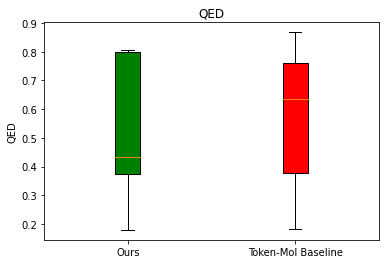

In [27]:
plt.title('QED')
plot = plt.boxplot([data_baseline['qed'], data_ours['qed']], patch_artist=True, sym="", labels=tick_labels)
for patch, color in zip(plot['boxes'], colors):
    patch.set_facecolor(color)
# plt.xlabel('Model')
plt.ylabel('QED')
plt.show()

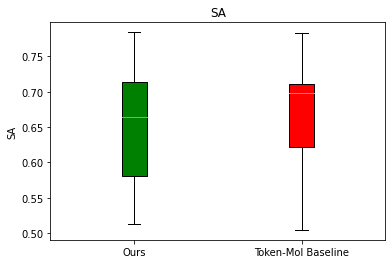

In [28]:
plt.title('SA')
plot = plt.boxplot([data_baseline['sa'], data_ours['sa']], patch_artist=True, sym="", labels=tick_labels)
for patch, color in zip(plot['boxes'], colors):
    patch.set_facecolor(color)
# plt.xlabel('Model')
plt.ylabel('SA')
plt.show()

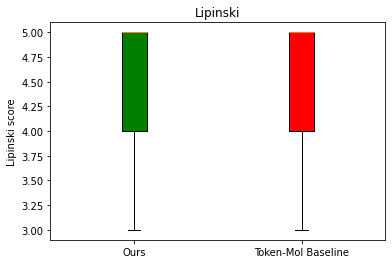

In [29]:
plt.title('Lipinski')
plot = plt.boxplot([data_baseline['lipinski'], data_ours['lipinski']], patch_artist=True, sym="", labels=tick_labels)
for patch, color in zip(plot['boxes'], colors):
    patch.set_facecolor(color)
# plt.xlabel('Model')
plt.ylabel('Lipinski score')
plt.show()

NameError: name 'tick_labels' is not defined

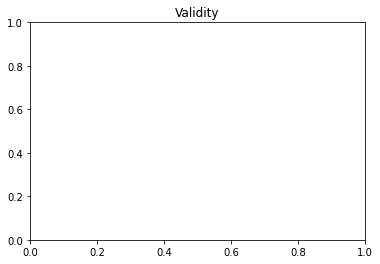

In [13]:
plt.title('Validity')
plot = plt.boxplot([data_baseline['valid_fraction'], data_ours['valid_fraction']], patch_artist=True, sym="", labels=tick_labels)
for patch, color in zip(plot['boxes'], colors):
    patch.set_facecolor(color)
# plt.xlabel('Model')
plt.ylabel('Validity')
plt.show()

In [5]:
import os
'3HAO_CUPMC_1_172_0' in os.listdir('/home/ubuntu/cs224r_project/AliDiff/data/CrossDocked2020')

True

In [3]:
from gen import predict

In [ ]:
with open('protein_filename.pkl', 'rb') as f:
    

In [13]:
import pickle
import sys
import os
sys.path.append('/home/ubuntu/cs224r_project/AliDiff/')
import datasets
with open('/home/ubuntu/cs224r_project/AliDiff/data/dpo_train_set.pkl', 'rb') as f:
    dpo_data = pickle.load(f)

ModuleNotFoundError: No module named 'datasets.merge_dataset'

In [17]:
import pickle
import sys
sys.path.append('/home/ubuntu/cs224r_project/AliDiff/')
import datasets
with open('/home/ubuntu/cs224r_project/AliDiff/win_data.pkl', 'rb') as f:
    p = pickle.load(f)

In [23]:
p[30]

'C # C c 1 c c c c ( C n 2 c c ( C C ( = O ) O ) c 3 c c c c c 3 2 ) c 1 GEO 0.97 2.30 -2.21 0.02 -1.02 -1.48'

In [10]:
from rdkit import Chem

# Load molecule from SDF file
sdf_file = "/home/ubuntu/cs224r_project/AliDiff/data/crossdocked_v1.3_rmsd1.0_pocket10/1A1D_CYBSA_1_341_0/1j0c_A_rec_1j0c_plp_lig_tt_docked_1.sdf"
supplier = Chem.SDMolSupplier(sdf_file, removeHs=False)

for mol in supplier:
    if mol is None:
        raise Exception()
        continue
    if mol.GetNumConformers() == 0:
        raise Exception()
        print("No conformers found in this molecule.")
        continue

    # Get the first conformer
    conformer = mol.GetConformer()

    # Print coordinates of first few atoms
    for atom_idx in range(mol.GetNumAtoms()):
        pos = conformer.GetAtomPosition(atom_idx)
        print(f"Atom {atom_idx}: ({pos.x:.2f}, {pos.y:.2f}, {pos.z:.2f})")

Atom 0: (29.73, 127.00, 17.00)
Atom 1: (29.13, 127.54, 18.14)
Atom 2: (27.89, 126.85, 18.71)
Atom 3: (29.68, 128.69, 18.72)
Atom 4: (29.11, 129.25, 19.84)
Atom 5: (30.84, 129.27, 18.12)
Atom 6: (31.45, 130.54, 18.77)
Atom 7: (31.42, 128.67, 16.95)
Atom 8: (30.84, 127.54, 16.42)
Atom 9: (28.35, 128.85, 20.22)
Atom 10: (32.64, 129.18, 16.23)
Atom 11: (33.88, 129.18, 16.87)
Atom 12: (34.89, 130.37, 16.67)
Atom 13: (35.78, 130.36, 17.84)
Atom 14: (33.92, 131.61, 16.60)
Atom 15: (35.49, 130.18, 15.36)
Atom 16: (33.50, 131.75, 17.46)
Atom 17: (36.09, 129.42, 15.38)


In [12]:
Chem.

AttributeError: 'Mol' object has no attribute 'smiles'

In [16]:
from datasets import load_dataset, Dataset
from trl import DPOConfig, DPOTrainer
from transformers import AutoModelForCausalLM, AutoTokenizer

model = AutoModelForCausalLM.from_pretrained("Qwen/Qwen2-0.5B-Instruct")
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2-0.5B-Instruct")
train_dataset = load_dataset("trl-lib/ultrafeedback_binarized", split="train")


In [17]:
train_set_updated = []
for el in train_dataset:
    train_set_updated.append({})
    train_set_updated[-1] = {
        'prompt': el['chosen'][0]['content'],
        'chosen': el['chosen'][1]['content'],
        'rejected': el['rejected'][1]['content']
    }
train_set_updated = Dataset.from_list(train_set_updated)

In [10]:
train_dataset[0]

{'chosen': [{'content': 'Use the pygame library to write a version of the classic game Snake, with a unique twist',
   'role': 'user'},
  {'content': "Sure, I'd be happy to help you write a version of the classic game Snake using the pygame library! Here's a basic outline of how we can approach this:\n\n1. First, we'll need to set up the game display and create a game object that we can use to handle the game's state.\n2. Next, we'll create the game's grid, which will be used to represent the game board. We'll need to define the size of the grid and the spaces within it.\n3. After that, we'll create the snake object, which will be used to represent the player's movement. We'll need to define the size of the snake and the speed at which it moves.\n4. We'll also need to create a food object, which will be used to represent the food that the player must collect to score points. We'll need to define the location of the food and the speed at which it moves.\n5. Once we have these objects se

In [18]:
training_args = DPOConfig(output_dir="Qwen2-0.5B-DPO", logging_steps=10)
trainer = DPOTrainer(model=model, args=training_args, tokenizer=tokenizer, train_dataset=train_set_updated)
trainer.train()

Trainer.tokenizer is now deprecated. You should use `Trainer.processing_class = processing_class` instead.
/home/ubuntu/miniconda3/envs/cs224r/lib/python3.8/site-packages/trl/trainer/dpo_trainer.py:660: UserWarning: `max_length` is not set in the DPOConfig's init it will default to `512` by default, but you should do it yourself in the future.
  warnings.warn(
/home/ubuntu/miniconda3/envs/cs224r/lib/python3.8/site-packages/trl/trainer/dpo_trainer.py:673: UserWarning: `max_prompt_length` is not set in the DPOConfig's init it will default to `128` by default, but you should do it yourself in the future.
  warnings.warn(
Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.
/home/ubuntu/miniconda3/envs/cs224r/lib/python3.8/site-packages/trl/trainer/dpo_trainer.py:708: UserWarning: When using DPODataCollatorWithPadding, you should set `remove_unused_columns=False` in your TrainingArguments we have set it for you, but you should do it yourself in the future.


: 

: 